<a href="https://colab.research.google.com/github/FelixEbenezer/TER/blob/main/C%C3%B3pia_de_ter_demo_naives_bayes_reg_lin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import random
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_immersion.csv', sep='\t', header=0)

In [ ]:
df.head(5)

,text,clean_text,label,length
0,"Allez, on remet ça !\n\nLONGUE VIE A CE TOPIC",Allez on remet ça LONGUE VIE A CE TOPIC,ados,9
1,oui,oui,ados,1
2,c'est un nouveau départ pour le forum,c'est un nouveau départ pour le forum,ados,7
3,On prend les mêmes et on recommence,On prend les mêmes et on recommence,ados,7
4,"y'avait pas une majuscule à ""nuit"" ?",y'avait pas une majuscule à `` nuit '',ados,8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


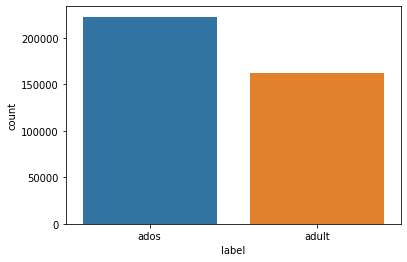

In [ ]:
sns.countplot(df['label'])

In [ ]:
df = df.drop(['clean_text', 'length'], axis=1)

In [ ]:
df.head(5)

,text,label
0,"Allez, on remet ça !\n\nLONGUE VIE A CE TOPIC",ados
1,oui,ados
2,c'est un nouveau départ pour le forum,ados
3,On prend les mêmes et on recommence,ados
4,"y'avait pas une majuscule à ""nuit"" ?",ados


In [ ]:
df_ados = df[df['label']=='ados'] #Retourne toutes les lignes ados

In [ ]:
#Recuperer aleatoirement 100000 lignes ados
df_ados_100 = df_ados.sample(5000)

In [ ]:
df1 = df[df['label']=='ados'][0:100] #Retourne aussi les 100 premieres lignes ados mais pas aleatoirement 

In [ ]:
df_ados_100.shape

(5000, 2)

In [ ]:
df_ados_100.head(5)

,text,label
77978,Hummm ça m'excite....,ados
190139,"Très: y'a des tantes,des trolls,des chieurs et...",ados
218509,9 & 10 =),ados
60438,Quelque pourrait me dire si c’est normal que m...,ados
209437,Je trouve l'article vraiment bien. Même si com...,ados


In [ ]:
df_ados_100.tail(5)

,text,label
163913,"Je vais essayer de la prendre demain, mais il ...",ados
35866,"Chapitre 4 : Au-delà des Frontières , Partie I...",ados
182616,"En réponse à fam43ir\nExtazyii, je pense que t...",ados
86892,tu comprends rien j'ai l'impression. Tu n'es p...,ados
160035,+1 mais des vestiaires mixtes seraient bien mieux,ados


In [ ]:
df_adult = df[df['label']=='adult']

In [ ]:
df_adult.shape

(162602, 2)

In [ ]:
df_adult_100 = df_adult.sample(5000)

In [ ]:
df_adult_100.tail(5)

,text,label
253954,Citation :\nj'en ai parler a des collègues ( j...,adult
293012,C'est quoi le lien entre le lit et la mort sub...,adult
246552,Oui nous avons fait une adaptation sur 4 jours...,adult
271770,ne pas être démonstrative ne veut pas dire que...,adult
233762,Pas besoin de ton jugement. Merci. Au revoir,adult


In [ ]:
df_adult_100.head(5)

,text,label
297748,En réponse à yse99qh\nessai\n\nFeu!,adult
291632,http://www.bientraitance.com/index2.php\n\nCit...,adult
248328,"C'est sympa comme sujet, c'est intéressant de ...",adult
276880,"Bonjour,\nC'est peut être tout simplement parc...",adult
366297,En réponse à hom55ar\nIl faut tout d'abord sav...,adult


In [ ]:
data = pd.concat([df_ados_100, df_adult_100])

In [ ]:
data.shape

(10000, 2)

In [ ]:
#Melanger les données de notre base (on peut aussi le faire avec sample comme ici df.sample(frac=1))
from sklearn.utils import shuffle
data = shuffle(data)

In [ ]:
data.head()

,text,label
135315,je sais pas ca m'exite c'est tout ^^\n\npuis j...,ados
14145,sont sur le forum skyzo,ados
230157,Oui je pense également que ta maman t'aime mai...,adult
108597,Bah pour mon pseudo et ma photo de profil,ados
290326,"TDF, c'est quoi cet avatar????? Moi j'aimai...",adult


In [ ]:
data.tail()

,text,label
271357,oui g le meme problème avec mon fils qui à 7 a...,adult
77384,ouais enfin ça même dans un couple normal c'es...,ados
300938,A mon avis les enfants ne doivent pas se senti...,adult
207568,Très attirée par V...,ados
316439,"Bonjour,\nje ne suis pas forcément au bon endr...",adult


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


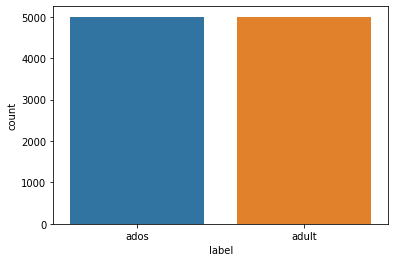

In [ ]:
sns.countplot(data['label'])

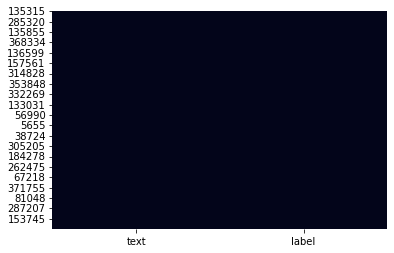

In [ ]:
sns.heatmap(data.isnull(), cbar=False)  #heatmap ou data.info nous permet de savoir si il y a des valeurs null. Aucune dans ce cas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 135315 to 316439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   label   10000 non-null  object
dtypes: object(2)
memory usage: 492.4+ KB


In [ ]:
data.isnull().sum()  #Meme chose pour verifier s il y a des valeurs null

text     0
label    0
dtype: int64

In [ ]:
#SI on veut savoir les mots qui reviennent souvent dans les textes dont le label est ados 

In [ ]:
phrase_ados = data[['text'] and data['label']=='ados']#.tolist()

In [ ]:
phrase_ados.tail(5)

,text,label
102281,"Salut Profil supprimé , comme il te l'a été pr...",ados
212877,"5. Désolé, c'est pas personnel, mais je suis n...",ados
20040,salut\n\nvoila jai 13 ans (depuis moin dun moi...,ados
77384,ouais enfin ça même dans un couple normal c'es...,ados
207568,Très attirée par V...,ados


In [ ]:
phrase_ados =phrase_ados['text'].tolist()

In [ ]:
len(phrase_ados)

5000

In [ ]:
phrase_ados_uni = ' '.join(phrase_ados)  #Pour mettre les phrases de notre base dans une seule string

In [ ]:
len(phrase_ados_uni)  #Pour savoir la taille de notre string ou meiux le nbre de caracteres de notre base

1230070

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

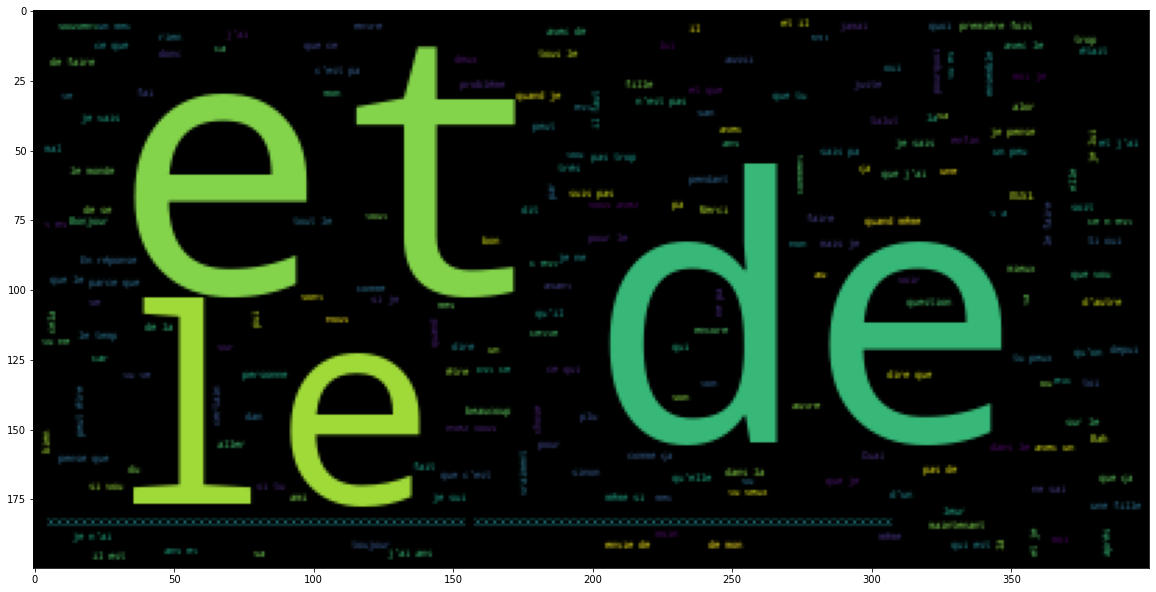

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(phrase_ados_uni))

In [ ]:
#On devrait faire le wordcloud apres avoir fait le nettoyage des textes pour éviter que les stopwords soient bcps representés

In [ ]:
#NETTOYAGE DES DONNÉES

In [ ]:
#Remotion of punctuation in text

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
ponctuation = string.punctuation.replace('.', '-')

In [ ]:
texte = 'Allez, on remet ça !\n\nLONGUE VIE A CE TOPIC'

In [ ]:
phrase_sans_ponct = [mot for mot in texte if mot not in ponctuation]

In [ ]:
print(phrase_sans_ponct)

['A', 'l', 'l', 'e', 'z', ' ', 'o', 'n', ' ', 'r', 'e', 'm', 'e', 't', ' ', 'ç', 'a', ' ', '\n', '\n', 'L', 'O', 'N', 'G', 'U', 'E', ' ', 'V', 'I', 'E', ' ', 'A', ' ', 'C', 'E', ' ', 'T', 'O', 'P', 'I', 'C']


In [ ]:
phrase_sans_ponct = ''.join(phrase_sans_ponct)

In [ ]:
print(phrase_sans_ponct)

Allez on remet ça 

LONGUE VIE A CE TOPIC


In [ ]:
#Remotion de stopwords


In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
print(stopwords.words('french'))

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aur

In [ ]:
remov_stop_words = [mot for mot in phrase_sans_ponct if mot not in stopwords.words('french')]

In [ ]:
print(remov_stop_words)

['A', 'e', 'z', ' ', 'o', ' ', 'r', 'e', 'e', ' ', 'ç', 'a', ' ', '\n', '\n', 'L', 'O', 'N', 'G', 'U', 'E', ' ', 'V', 'I', 'E', ' ', 'A', ' ', 'C', 'E', ' ', 'T', 'O', 'P', 'I', 'C']


In [ ]:
remov_stop_words = ''.join(remov_stop_words)

In [ ]:
print(remov_stop_words)

Aez o ree ça 

LONGUE VIE A CE TOPIC


TOKENIZATION ET COUNT VECTORIZATION 
Transformer lettres en chiffres 

In [ ]:
#contage de mots dans une phrase
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
sample_data = ['This is the first document', 'and this is the second document', 'the third one is there', 'and where is the last document']

In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)  #Evidemment existe autres formes plus avancées de transformer lettres en chiffres 

In [ ]:
#pour retourner les textes ou mots uniques de la phrase
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'last', 'one', 'second', 'the', 'there', 'third', 'this', 'where']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Si je vais voir le contenu de ma phrase avec les chiffres 
print(X.toarray())

[[0 1 1 1 0 0 0 1 0 0 1 0]
 [1 1 0 1 0 0 1 1 0 0 1 0]
 [0 0 0 1 0 1 0 1 1 1 0 0]
 [1 1 0 1 1 0 0 1 0 0 0 1]]


In [ ]:
#PIPELINE POUR LE NETOYAGE DES TEXTES, en unissant les 3 fonctions vues ci haut a savoir, la ponctuation, stopwords et vectorizer 

In [ ]:
#Je crée une fonction que remove string.ponctuation and stops words
def remove_ponct_stopwords(phrase):
  #phrase = []
  phrase = [mot for mot in phrase if mot not in ponctuation]
  phrase = ''.join(phrase)
  phrase = [mot for mot in phrase.split() if mot.lower() not in stopwords.words('french')]
  return phrase 

In [ ]:
texte = 'Je sui malade, et demain je pense aller à l´hôpital!!!!!!'
print(remove_ponct_stopwords(texte))

['sui', 'malade', 'demain', 'pense', 'aller', 'l´hôpital']


In [ ]:
#Et du coup je peux faire ce nettoyage sur le texte de ma base 
df1 = data
df1.shape

(10000, 2)

In [ ]:
df1_clean = df1['text'].apply(remove_ponct_stopwords)

In [ ]:
print(df1_clean.head())

135315    [sais, ca, mexite, cest, tout, puis, trouve, c...
14145                                        [forum, skyzo]
230157    [Oui, pense, également, maman, taime, x, raiso...
108597                         [Bah, pseudo, photo, profil]
290326    [TDF, cest, quoi, cet, avatar, jaimais, bien, ...
Name: text, dtype: object


In [ ]:
print(df1_clean.head(1))

135315    [sais, ca, mexite, cest, tout, puis, trouve, c...
Name: text, dtype: object


In [ ]:
print(df.loc[323433, ['text']])

text    bonjour\n\nas-tu su d'ou venait le probleme d'...
Name: 323433, dtype: object


In [ ]:
df1_clean

135315    [sais, ca, mexite, cest, tout, puis, trouve, c...
14145                                        [forum, skyzo]
230157    [Oui, pense, également, maman, taime, x, raiso...
108597                         [Bah, pseudo, photo, profil]
290326    [TDF, cest, quoi, cet, avatar, jaimais, bien, ...
                                ...                        
271357    [oui, g, meme, problème, fils, 7, ans, fait, p...
77384     [ouais, enfin, ça, couple, normal, cest, peu, ...
300938    [A, avis, enfants, doivent, sentir, place, cet...
207568                                [Très, attirée, V...]
316439    [Bonjour, forcément, bon, endroit, seulement, ...
Name: text, Length: 10000, dtype: object

In [ ]:
#Maintenant on va passer tous ces textes en liste en numeros/chifrres utilisant vectorizer 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=remove_ponct_stopwords)

X = vectorizer.fit_transform(df1['text'])  #Evidemment existe autres formes plus avancées de transformer lettres en chiffres 

In [ ]:
#Si on veut les mots uniques qui constituent nos phrases dans notre base
print(vectorizer.get_feature_names())

['.', '..', '...', '....', '.....', '......', '.......', '........', '.........', '..........', '...........', '............', '.............', '................', '.......................', '.........................', '................................', '..........................................................', '......................................................................', '..........................Nous', '........................Pour', '......................Enfin', '...................je', '.............ce', '..........Il', '..........avec', '.........mais', '........sagesse', '........sujet', '.......ect.........le', '.......ou', '.......tout', '......cest', '......et', '......lon', '......mais', '......merde', '.....Si', '.....car', '.....généreuse', '.....je', '.....que', '.....ça', '....Avant', '....Le', '....Vous', '....et', '....je', '....jespere', '....mais', '....maitresse', '....on', '....pendant', '....pour', '....qui', '....un', '....à', '....écouter...', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#Pour savoir le nombre total de mots uniques de notre base, on a donc 50861 mots uniques dans notre base  
len(vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


50950

In [ ]:
X.shape  #Ça nous montre que nous avons bien 100mil phreases avec 51404 colonnes correspondant a chauqe mot unique et que pour chaque mot unique, sa frequence est indiquée pour chaque phrase 

(10000, 50950)

In [ ]:
print(X[1:10].toarray()) #juste pour voir que notre X maintenant est fait que de chifrres 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
#ON doit maintenant ajouter cette X dans notre base generale df1, car si on fait df1, on voit que notre base n a pas bougé, n a pas incorporé X

In [ ]:
df1.shape

(10000, 2)

In [ ]:
df1

,text,label
135315,je sais pas ca m'exite c'est tout ^^\n\npuis j...,ados
14145,sont sur le forum skyzo,ados
230157,Oui je pense également que ta maman t'aime mai...,adult
108597,Bah pour mon pseudo et ma photo de profil,ados
290326,"TDF, c'est quoi cet avatar????? Moi j'aimai...",adult
...,...,...
271357,oui g le meme problème avec mon fils qui à 7 a...,adult
77384,ouais enfin ça même dans un couple normal c'es...,ados
300938,A mon avis les enfants ne doivent pas se senti...,adult
207568,Très attirée par V...,ados


In [ ]:
#On va d abord eliminer la colonne text de notre df1 pour apres le remplacer par X qui ne contient que de chiffres au lien de lettre 

In [ ]:
df1.drop(['text'], axis = 1, inplace = True)

In [ ]:
df1

,label
135315,ados
14145,ados
230157,adult
108597,ados
290326,adult
...,...
271357,adult
77384,ados
300938,adult
207568,ados


In [ ]:
type(X)

scipy.sparse.csr.csr_matrix

In [ ]:
#X est une matrix, on doit la transformer en dataframe pour l ajouter dans df1
text = pd.DataFrame(X.toarray(), index=df1.index)   #index=df1.index: CA PERMET A CE QUE la nouvelle dataframe text ait les memes indices que ceux de df1
                                                  #Car si on fait pas ça, au moment de concattener les 2 dataframes, au lieu d avoit toujours 10mil linges tu en aureas 20mil p
                                                  #puisque la nouvelle dataframe prendra et les indices de dataframa1 auxquels s ajoutera ceux de datafram2

In [ ]:
text.shape

(10000, 50950)

In [ ]:
#text = text.astype(int) 

In [ ]:
type(text)

pandas.core.frame.DataFrame

In [ ]:
text.head()

,0,1,2,3,4,5,6,7,8,9,...,50940,50941,50942,50943,50944,50945,50946,50947,50948,50949
135315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
df1.shape

(10000, 1)

In [ ]:
df1 = pd.concat([df1, text], axis = 1)   #Ou avec merge df3 = df1.merge(text, how='outer', left_index=True, right_index=True)

In [ ]:
df1.shape

(10000, 50951)

In [ ]:
df1

,label,0,1,2,3,4,5,6,7,8,...,50940,50941,50942,50943,50944,50945,50946,50947,50948,50949
135315,ados,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14145,ados,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230157,adult,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108597,ados,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290326,adult,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271357,adult,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77384,ados,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300938,adult,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207568,ados,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#CREATION DES VARIABLES DEPENDANTES ET INDEPENDANTES

In [ ]:
x = df1.drop(['label'], axis=1)

In [ ]:
x

,0,1,2,3,4,5,6,7,8,9,...,50940,50941,50942,50943,50944,50945,50946,50947,50948,50949
135315,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
290326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77384,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df1['label']

In [ ]:
y

135315     ados
14145      ados
230157    adult
108597     ados
290326    adult
          ...  
271357    adult
77384      ados
300938    adult
207568     ados
316439    adult
Name: label, Length: 10000, dtype: object

In [ ]:
#Transformer les valeurs de y en chiffres

In [ ]:
y[y=='ados'] = 0
y[y=='adult'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
y

135315    0
14145     0
230157    1
108597    0
290326    1
         ..
271357    1
77384     0
300938    1
207568    0
316439    1
Name: label, Length: 10000, dtype: object

In [ ]:
#Reinser les nouvelles valeurs de y dans df1

In [ ]:
y = df1['label']
y

135315    0
14145     0
230157    1
108597    0
290326    1
         ..
271357    1
77384     0
300938    1
207568    0
316439    1
Name: label, Length: 10000, dtype: object

In [ ]:
y=y.astype('int')  #pour eviter l erreur ValueError: Unknown label type: 'unknown' car Your y is of type object, so sklearn cannot recognize its type. Add the line y=y.astype('int')

ENTRAINEMENT ET EVALUATION DE NAIVES BAYES

In [ ]:
#Division de données en train et test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  #Pour voir les nbre de linges et colonne de chacune de ces variables

((8000, 50950), (2000, 50950), (8000,), (2000,))

In [ ]:
y_train

358306    1
172181    0
198640    0
21018     0
349661    1
         ..
239263    1
10140     0
157773    0
253970    1
318638    1
Name: label, Length: 8000, dtype: int64

In [ ]:
y_test

274080    1
95977     0
8101      0
285386    1
346770    1
         ..
46225     0
338186    1
239902    1
76543     0
359598    1
Name: label, Length: 2000, dtype: int64

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,50940,50941,50942,50943,50944,50945,50946,50947,50948,50949
274080,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
285386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346770,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46225,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239902,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76543,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Importer l algo naive bayes
from sklearn.naive_bayes import MultinomialNB

In [ ]:
naives_bayes = MultinomialNB()
naives_bayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
y_pred = naives_bayes.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
accuracy_score(y_test, y_pred) #77% de accuracy pour naives bayes

0.767

In [ ]:
#Evaluation avec matrix de confusio
cm = confusion_matrix(y_test, y_pred)
cm

array([[719, 275],
       [145, 861]])

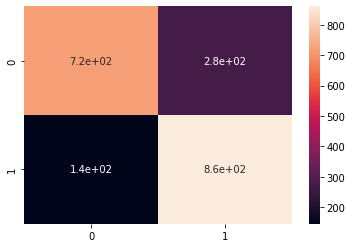

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))  #On peut voir que  notre algo acertou pour les ados(0) en 80% de precision et les adults(1) en 74%

              precision    recall  f1-score   support

           0       0.83      0.72      0.77       994
           1       0.76      0.86      0.80      1006

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



ENTRAINEMENT ET EVALUATION AVEC LA REGRESSION LOGISTIQUE

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = logistic.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)  #79% de accuracy pour naives bayes dont 75 pour la precision ados et 86 pour les adults 

0.793

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       994
           1       0.86      0.70      0.77      1006

    accuracy                           0.79      2000
   macro avg       0.80      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000



CLASSIFICATION DE UNE PHRASE

In [ ]:
#Nous allons save notre modele dans un fichier
import pickle

In [ ]:
with open ('txt_classifieurs.pkl', 'wb') as file:
  pickle.dump([naives_bayes, vectorizer], file)  #Cad on veut save que les contenus de variables naives_bayes et vectorizer

In [ ]:
#Donc c est ce fichier que le developpeur web va s en servir pour faire la partie front

In [ ]:
#Pour l ouvrir
with open('txt_classifieurs.pkl', 'rb') as f:
  naives, vec = pickle.load(f)

In [ ]:
#on peut inclusive voir ce qu il y dans ces variables meme si elees sont codées

In [ ]:
naives

MultinomialNB()

In [ ]:
vec

CountVectorizer(analyzer=<function remove_ponct_stopwords at 0x7fae5b629b00>)

In [ ]:
#On prepare notre texte tirée de la base avec lequel on va faire un essai

In [ ]:
df

,text,label
0,"Allez, on remet ça !\n\nLONGUE VIE A CE TOPIC",ados
1,oui,ados
2,c'est un nouveau départ pour le forum,ados
3,On prend les mêmes et on recommence,ados
4,"y'avait pas une majuscule à ""nuit"" ?",ados
...,...,...
385519,heu on a t'as deja repondu ailleurt il me semb...,adult
385520,En réponse à FHL44\nheu on a t'as deja repondu...,adult
385521,"Coucou tout le monde!\nAlors voila,hier soir j...",adult
385522,"concernant le saignement et la douleur, on est...",adult


In [ ]:
texte = df.iloc[0:1, [0]]
texte

,text
0,"Allez, on remet ça !\n\nLONGUE VIE A CE TOPIC"


In [ ]:
#On va appliquer differentes transformations qu on a fait avec la variable y depuis le debut

In [ ]:
texte_countvectorizer = vec.transform(texte['text'])

In [ ]:
texte_countvectorizer  #On peut voir que transformer ce texte en 50950 colonnes comme c etait pour les autres

<1x50950 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
#on peut maintenant effacer la colonne Text vu que ça a été remplacé par les colonnes de chiffres
texte.drop(['text'], axis=1, inplace=True)

In [ ]:
X = pd.DataFrame(texte_countvectorizer.toarray())

In [ ]:
#On va maintenant concatener les 2 X et texte comme on l avait fait ci haut, relembrando pour concatener les indices 
#les indices doivent etre les memes 

In [ ]:
texte.index = X.index

In [ ]:
texte_final = pd.concat([texte, X], axis=1)

In [ ]:
texte_final

,0,1,2,3,4,5,6,7,8,9,...,50940,50941,50942,50943,50944,50945,50946,50947,50948,50949
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Et pour predire, on fait ça avec la variable ci haute naives

In [ ]:
naives.predict(texte_final)  #Et on peu voir par sa reponse que 0 signifie Ados, on peut confirmer que la phrase 0 de df ci haute est d un ados.
                            #Donc notre algo marche tres bine 

array([0])